In [1]:
import os, warnings
# 경고 메시지 무시하거나 숨길때(ignore), 다시보이게(default)
# warnings.filterwarnings(action='default')
warnings.filterwarnings(action='ignore')

In [2]:
# 한글
import matplotlib
from matplotlib import font_manager, rc
font_loc = "C:/Windows/Fonts/malgunbd.ttf"
font_name = font_manager.FontProperties(fname=font_loc).get_name()
matplotlib.rc('font', family=font_name)

matplotlib.rcParams['axes.unicode_minus'] = False

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
rnd = np.random.RandomState(0)
X_org = rnd.normal(size=(1000,3))
print(X_org.shape)

(1000, 3)


In [5]:
w = rnd.normal(size=3)
print(w.shape)

(3,)


In [6]:
X = rnd.poisson(10 * np.exp(X_org))
y = np.dot(X_org, w)

In [7]:
print(y.shape)

(1000,)


In [9]:
X.shape

(1000, 3)

### X의 첫번째 열 값 빈도 수

In [8]:
print('값들의 출현 횟수 : ', np.bincount(X[:,0]))

값들의 출현 횟수 :  [28 38 68 48 61 59 45 56 37 40 35 34 36 26 23 26 27 21 23 23 18 21 10  9
 17  9  7 14 12  7  3  8  4  5  5  3  4  2  4  1  1  3  2  5  3  8  2  5
  2  1  2  3  3  2  2  3  3  0  1  2  1  0  0  3  1  0  0  0  1  3  0  1
  0  2  0  1  1  0  0  0  0  1  0  0  2  2  0  1  1  0  0  0  0  1  1  0
  0  0  0  0  0  0  1  0  0  0  0  0  1  1  0  0  1  0  0  0  0  0  0  0
  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]


Text(0.5, 0, '값')

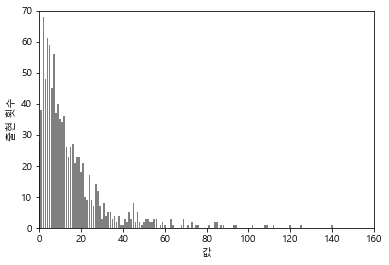

In [10]:
plt.xlim(0, 160)
plt.ylim(0, 70)
bins = np.bincount(X[:, 0])
plt.bar(range(len(bins)), bins, color='grey')
plt.ylabel("출현 횟수")
plt.xlabel("값")

### X의 첫번째, 두번째 열 값 빈도 수

Text(0.5, 0, '값')

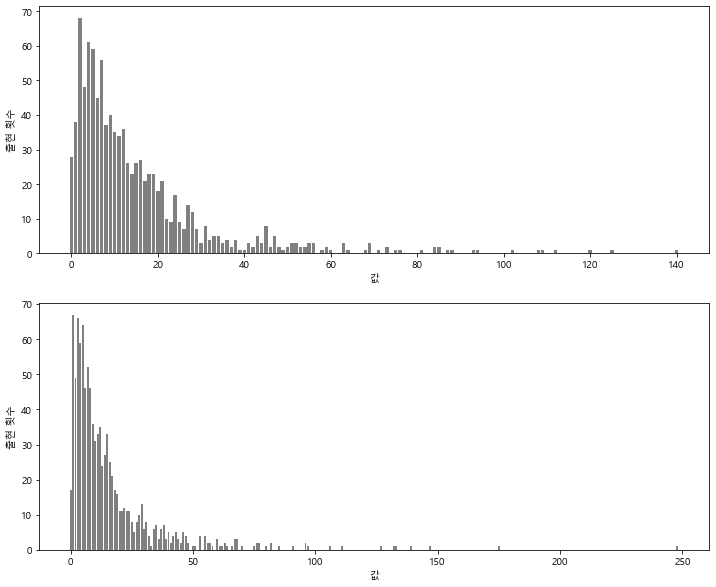

In [11]:
plt.figure(figsize=(12, 10))

# 첫번째 열 빈도수
plt.subplot(2,1,1)
bins = np.bincount(X[:, 0])
plt.bar(range(len(bins)), bins, color='grey')
plt.ylabel("출현 횟수")
plt.xlabel("값")

# 두번째 열 빈도수
plt.subplot(2,1,2)
bins = np.bincount(X[:, 1])
plt.bar(range(len(bins)), bins, color='grey')
plt.ylabel("출현 횟수")
plt.xlabel("값")

## Ridge(L2 규제)

In [12]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
model = Ridge().fit(X_train, y_train)
model.score(X_test, y_test)

0.6224186236310758

In [14]:
# 훈련, 테스트 셋에 log 취하기
X_train_log = np.log(X_train + 1)
X_test_log = np.log(X_test + 1)

Text(0.5, 0, '값(log적용)')

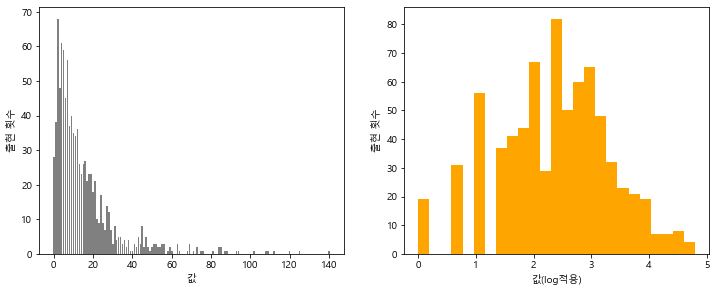

In [20]:
plt.figure(figsize=(12, 10))

plt.subplot(2,2,1)
bins = np.bincount(X[:, 0])
plt.bar(range(len(bins)), bins, color='grey')
plt.ylabel("출현 횟수")
plt.xlabel("값")

plt.subplot(2,2,2)
plt.hist( X_train_log[:, 0], bins=25, color='orange')
plt.ylabel("출현 횟수")
plt.xlabel("값(log적용)")

In [21]:
model = Ridge().fit(X_train_log, y_train)
model.score(X_test_log, y_test)

0.8749342372887815